In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math
import pandas as pd

import pickle

plt.rcParams["figure.figsize"] = (15,10)

We will import the same range of data we used for Lab05.

In [3]:
higgs = open('higgs_100000_pt_250_500.pkl', 'rb')
data_higgs = pickle.load(higgs)
data_higgs.keys()
higgs.close()

In [4]:
qcd = open('qcd_100000_pt_250_500.pkl', 'rb')
data_qcd = pickle.load(qcd)
data_qcd.keys()
qcd.close()

In [5]:
data_higgs

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,478.658254,-0.837586,-2.609921,125.707302,0.138041,0.001494,0.567994,0.000953,1.192189,0.131294,0.109689,0.110129,0.835446,0.504678
99996,465.171259,0.429341,-1.446681,129.749906,0.135890,0.002071,0.825176,0.005110,0.751448,0.140336,0.115123,0.186755,0.820334,0.586032
99997,466.920808,-0.805493,-0.754703,49.069161,0.020281,0.000121,14.506839,0.004768,0.864723,0.568722,0.395942,0.657693,0.696196,0.018073
99998,471.611853,0.801813,-3.077883,117.186361,0.102276,0.002399,2.242231,0.006947,0.759346,0.318427,0.274153,0.419343,0.860960,0.641892


In [6]:
data_qcd

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
1,401.041884,-1.170413,0.188817,88.047054,0.101181,0.002527,2.439089,0.001561,0.852379,0.517657,0.336052,0.607308,0.649178,0.477481
2,447.487556,1.861736,-2.326646,85.794174,0.069372,0.001375,4.118371,0.000197,0.979133,0.815123,0.700152,0.832495,0.858953,0.117091
3,402.652836,1.276421,-1.124176,42.947328,0.032095,0.000266,8.038338,0.001144,1.020193,0.664347,0.617499,0.651197,0.929482,0.054606
4,484.257672,-1.272225,1.966794,59.542227,0.038348,0.000358,6.353842,0.001619,0.875408,0.436270,0.376816,0.498362,0.863723,0.095201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,418.171225,1.804938,-1.555512,67.399102,0.047555,0.000669,6.216951,0.000335,0.794253,0.734325,0.533141,0.924548,0.726028,0.039376
99996,492.119236,-0.037258,0.037888,90.775772,0.095329,0.001090,1.258409,0.005327,0.849051,0.285315,0.177652,0.336041,0.622651,0.321335
99997,492.932552,-0.912632,0.578690,106.611253,0.078793,0.002331,4.764786,0.004449,0.951293,0.789768,0.620329,0.830205,0.785457,0.053165
99998,402.673975,-1.736921,-2.103913,66.278542,0.066585,0.000851,2.881152,0.000324,0.831466,0.488685,0.429960,0.587739,0.879831,0.212806


# Problem 1

We are asked to make a stacked histogram for the feature mass.

In [11]:
print(np.max(data_higgs['mass']))
print(np.min(data_higgs['mass']))
print(np.max(data_qcd['mass']))
print(np.min(data_qcd['mass']))

142.43960717193664
8.971221491285528
321.39799320084865
9.292817333809852


A range of [0, 330] will work fine with our mass data.

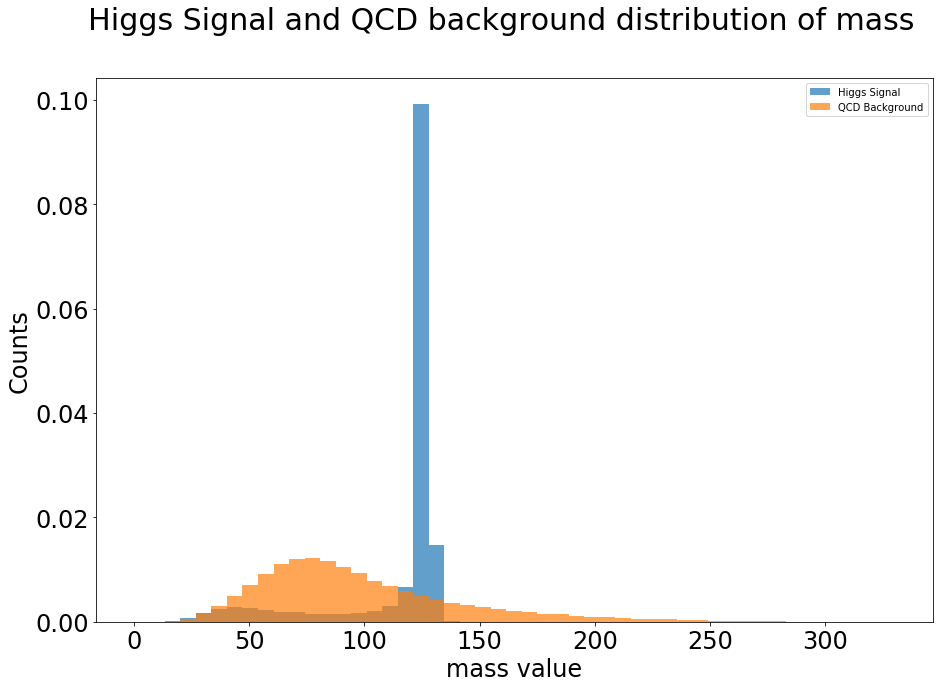

In [66]:
plt.suptitle('Higgs Signal and QCD background distribution of mass', fontsize=30)
plt.xlabel('mass value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
#plt.yscale('log')
plt.hist(data_higgs['mass'], bins = np.linspace(0,330,50), density=True, alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['mass'], bins = np.linspace(0,330,50), density=True, alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

For the lower pT dataset, we're expecting to see 100 Higgs signal ($N_{higgs}$ = 100) from 20,000 QCD background ($N_{higgs}$ = 20000).

If there is truly a signal, we should be observing 20,100 events from a background of a Poisson centered at 20,000.
<br>What's the probability that there isn't a signal and our background produced as or more significant as our expected signal?

In [137]:
value = stats.poisson.sf(20000 + 100, mu = 20000, loc=0)
sigma = stats.norm.isf(value, 0, 1)
sigma

0.7112259282313185

**It appears our expected significance is 0.711$\sigma$.**

We can also use $N_{higgs} / \sqrt(N_{QCD})$ to approximate the sigma value of our signal.

Justification: In a Poisson distribution, the variance is the same as the mean (the number of events), which is the Standard Deviation squared.

In [226]:
100/(20000 ** 0.5)

0.7071067811865475

The estimation is close enough to the sigma value we computed above.

# Problem 2

From the plot, it's clear that no Higgs signal have a mass of 150 or more, so we can try selecting mass from [0, 150].

In [141]:
mean = np.mean(data_qcd[data_qcd['mass'] <= 150]['mass'])

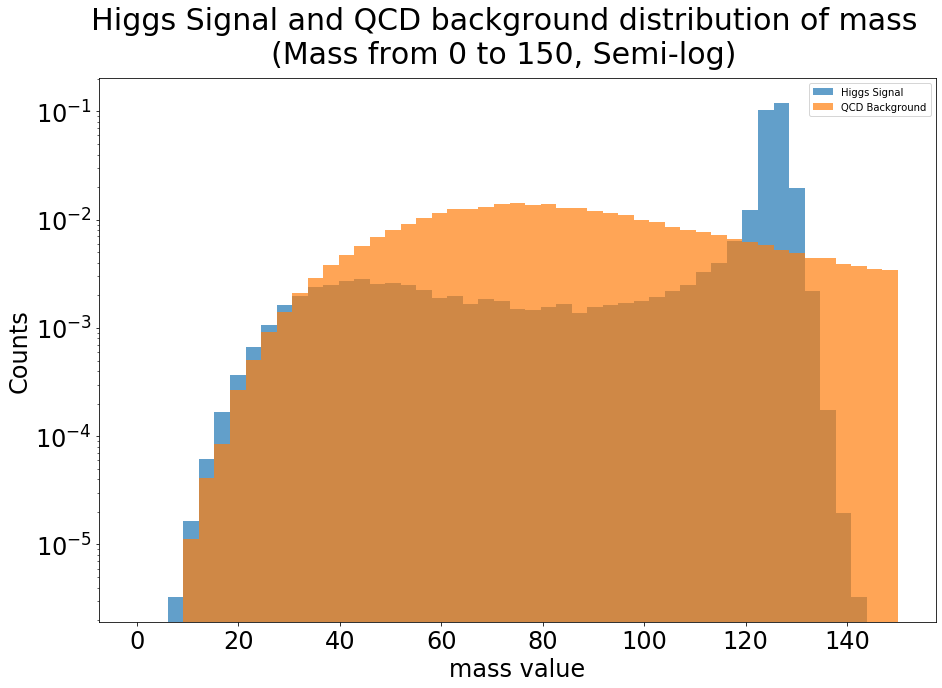

In [142]:
plt.suptitle('Higgs Signal and QCD background distribution of mass\n(Mass from 0 to 150, Semi-log)', fontsize=30)
plt.xlabel('mass value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.hist(data_higgs[data_higgs['mass'] <= 150]['mass'], bins = np.linspace(0,150,50), density=True, alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd[data_qcd['mass'] <= 150]['mass'], bins = np.linspace(0,150,50), density=True, alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

In [151]:
p_higgs =len(data_higgs[data_higgs['mass'] <= 150]['mass']) / 100000
p_higgs

1.0

In [152]:
p_qcd =len(data_qcd[data_qcd['mass'] <= 150]['mass']) / 100000
p_qcd

0.87704

In [155]:
100 * p_higgs /((20000 * p_qcd) ** 0.5)

0.7550492866957622

**By selecting the mass of [0, 150], we increased the expected significance from 0.711 Sigma to 0.755 Sigma.**
<br>The improvement is there but not much. We should try another way to optimize our data.

We also see from the plot that most of the Higgs signals appear to be from the range [120,140]. We shall use that range as our next attempt.

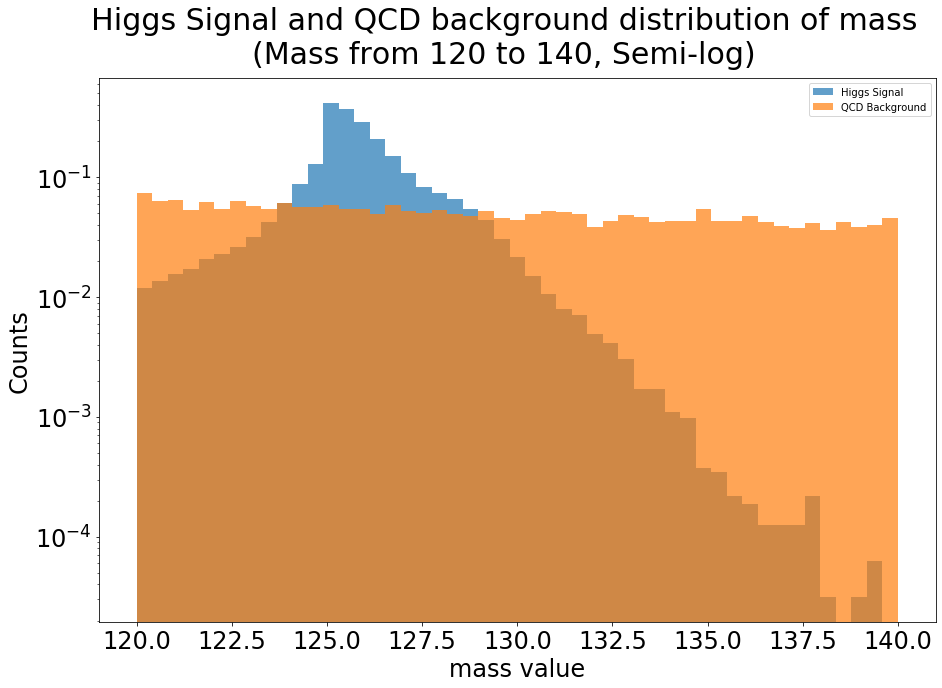

In [227]:
plt.suptitle('Higgs Signal and QCD background distribution of mass\n(Mass from 120 to 140, Semi-log)', fontsize=30)
plt.xlabel('mass value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.hist(data_higgs[(data_higgs['mass'] <= 140) & (data_higgs['mass'] >= 120)]['mass'], bins = np.linspace(120,140,50), density=True, alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd[(data_qcd['mass'] <= 140) & (data_qcd['mass'] >= 120)]['mass'], bins = np.linspace(120,140,50), density=True, alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

In [228]:
p_higgs = len(data_higgs[(data_higgs['mass'] <= 140) & (data_higgs['mass'] >= 120)]['mass']) / 100000
p_qcd = len(data_qcd[(data_qcd['mass'] <= 140) & (data_qcd['mass'] >= 120)]['mass']) / 100000
100 * p_higgs /((20000 * p_qcd) ** 0.5)

1.8618119009737553

**We have increased the expected significance to 1.862 Sigma.**
<br>This is a lot higher than the previous attempt, so it appears we've done a good job already.

However, eyeballing doesn't easily give the best answer.
<br>So we will use computational power to iterate over all possible mass cuts, find the expected significance for each cut, and find the lower and upper threasholds that yield the highest significance.

Our original stacked histogram range from 0 to 330, we will iterate over all intergers to find the best cut.

In [232]:
# Initialize data. 
# The worst result we can get is getting no cuts and a significance of zero.
sigma = 0
trs_lo = 0
trs_hi = 330
    # The start of the cut can be any value on the x axis
for i in np.arange(330):
    # The end of the cut must be larger than the start of the cut
    for j in np.arange(i + 1,330):
        lo = 0 + i
        hi = 0 + j
        p_higgs = len(data_higgs[(data_higgs['mass'] >= lo) & (data_higgs['mass'] <= hi)]['mass']) / 100000
        p_qcd = len(data_qcd[(data_qcd['mass'] >= lo) & (data_qcd['mass'] <= hi)]['mass']) / 100000
        # We could run into a cut so small where we included no qcd entries.
        # We will use this condition to avoid dividing by zero.
        if p_qcd > 0 :
            test = 100 * p_higgs / ((20000 * p_qcd) ** 0.5)
            # Replace the expected significance if our new expected significance is even larger.
            if test > sigma:
                sigma = test
                trs_lo = lo
                trs_hi = hi
print(sigma)
print(trs_lo)
print(trs_hi)

3.127862716779168
124
127


We've found our expected significance. Let's verify it.

In [233]:
p_higgs = len(data_higgs[(data_higgs['mass'] <= 127) & (data_higgs['mass'] >= 124)]['mass']) / 100000
p_qcd = len(data_qcd[(data_qcd['mass'] <= 127) & (data_qcd['mass'] >= 124)]['mass']) / 100000
100 * p_higgs /((20000 * p_qcd) ** 0.5)

3.127862716779168

It appears that **if we use mass cut [124, 127], we can get the highest expected significance at 3.128.

# Problem 3

First, we'll plot stacked histogram for every other feature.

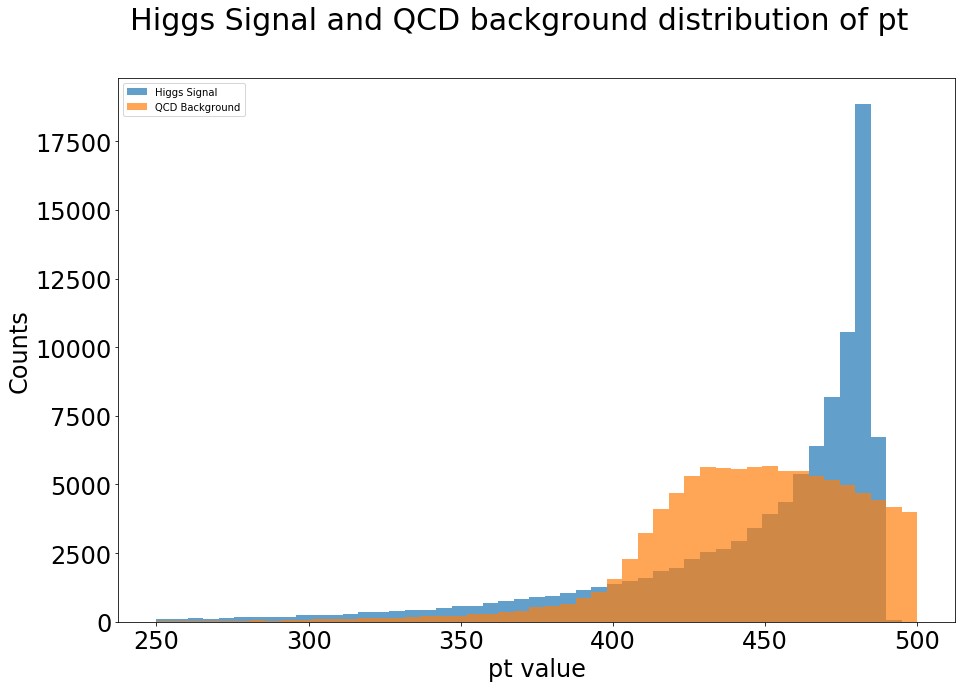

In [160]:
plt.suptitle('Higgs Signal and QCD background distribution of pt ', fontsize=30)
plt.xlabel('pt value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['pt'], bins = np.linspace(250,500,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['pt'], bins = np.linspace(250,500,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

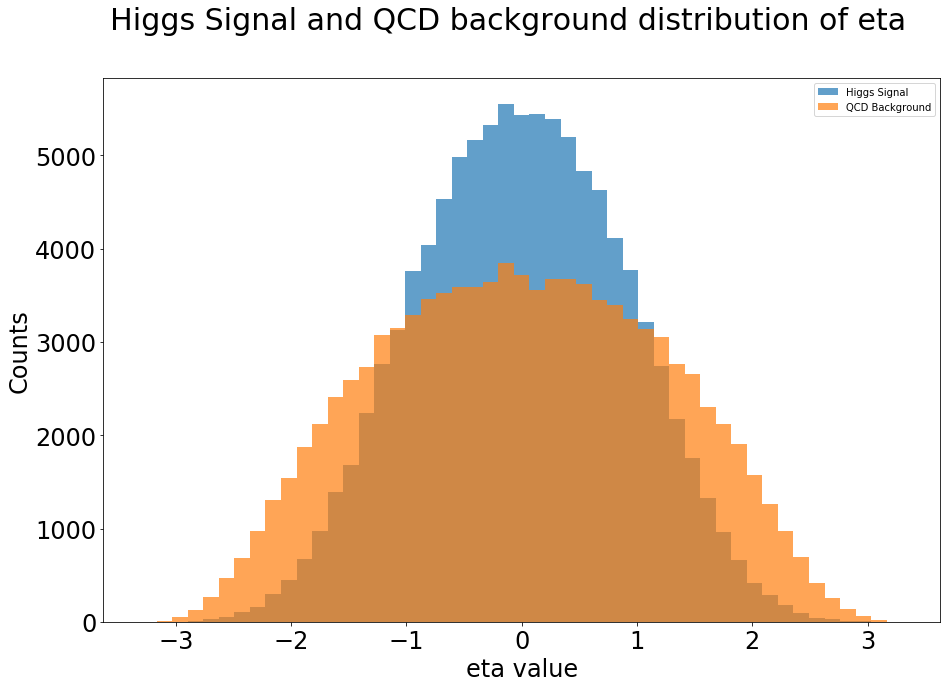

In [79]:
plt.suptitle('Higgs Signal and QCD background distribution of eta', fontsize=30)
plt.xlabel('eta value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['eta'], bins = np.linspace(-3.3,3.3,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['eta'], bins = np.linspace(-3.3,3.3,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

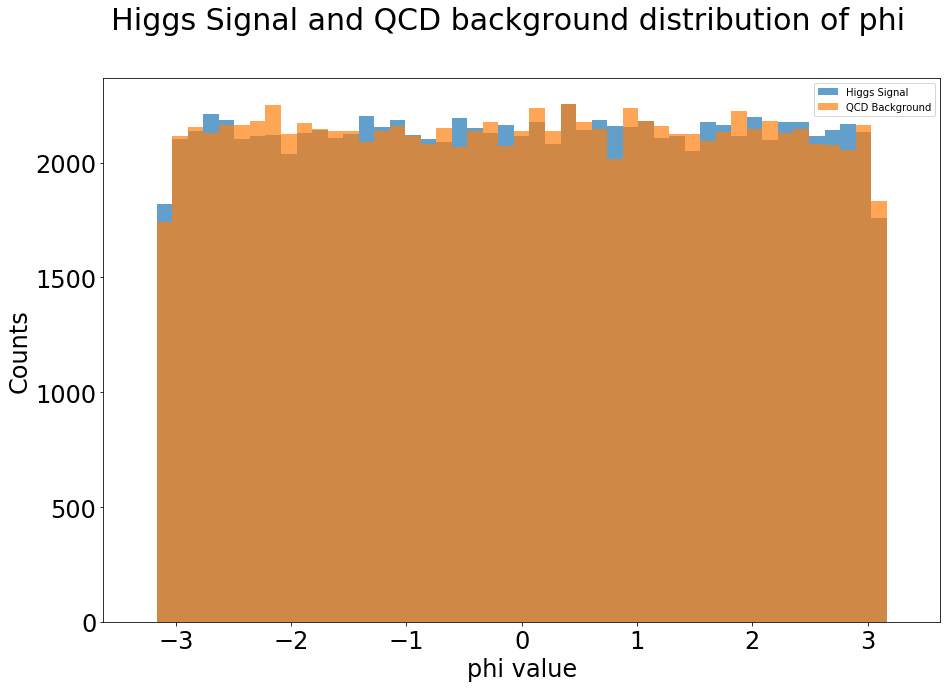

In [80]:
plt.suptitle('Higgs Signal and QCD background distribution of phi', fontsize=30)
plt.xlabel('phi value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['phi'], bins = np.linspace(-3.3,3.3,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['phi'], bins = np.linspace(-3.3,3.3,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

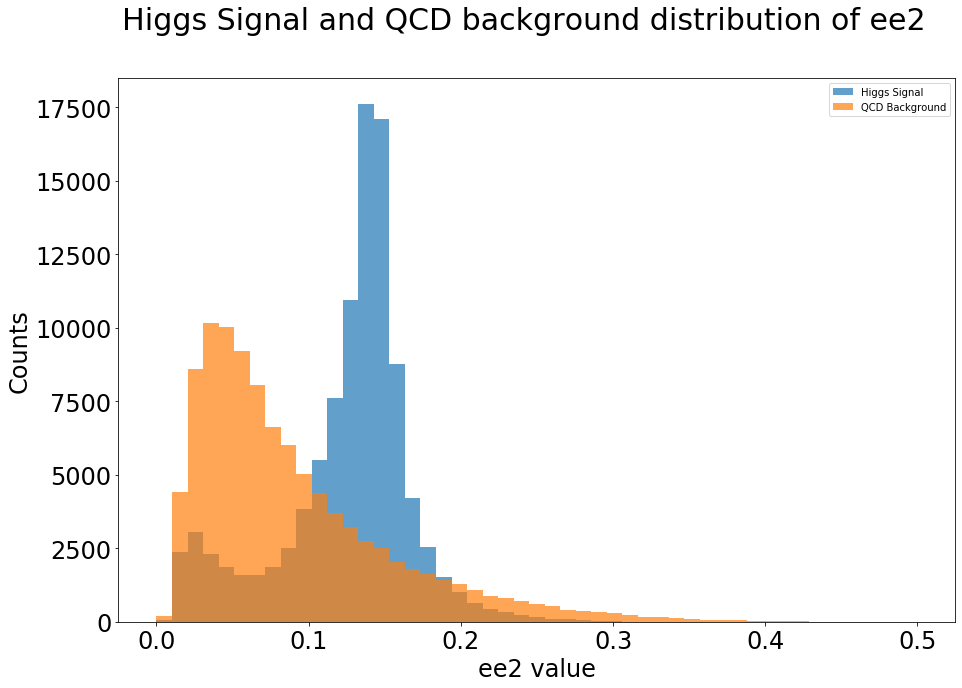

In [82]:
plt.suptitle('Higgs Signal and QCD background distribution of ee2', fontsize=30)
plt.xlabel('ee2 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['ee2'], bins = np.linspace(0,0.5,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['ee2'], bins = np.linspace(0,0.5,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

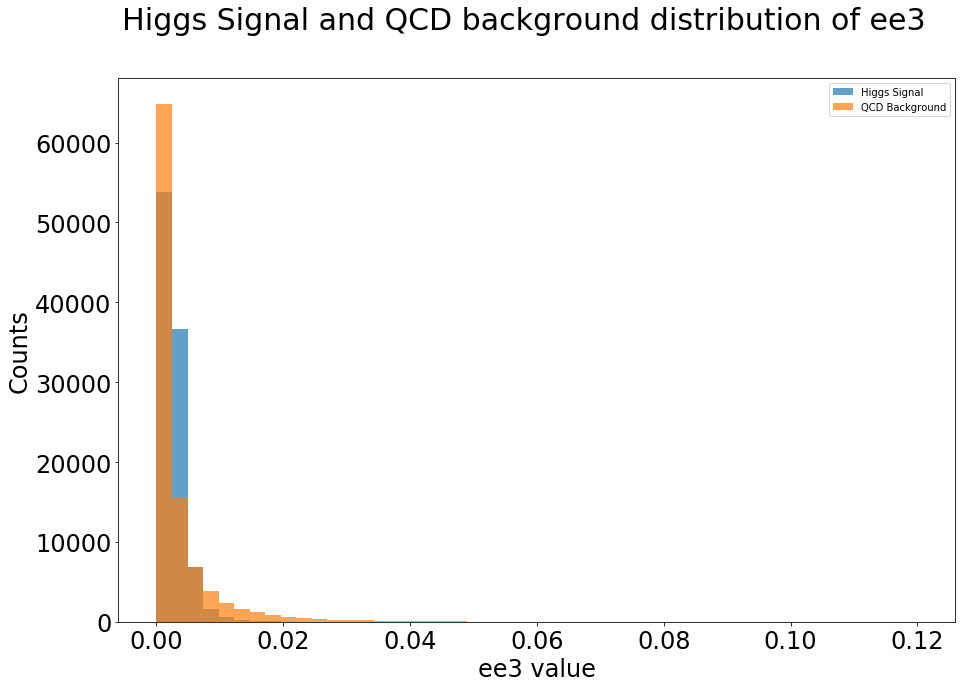

In [83]:
plt.suptitle('Higgs Signal and QCD background distribution of ee3', fontsize=30)
plt.xlabel('ee3 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['ee3'], bins = np.linspace(0,0.12,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['ee3'], bins = np.linspace(0,0.12,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

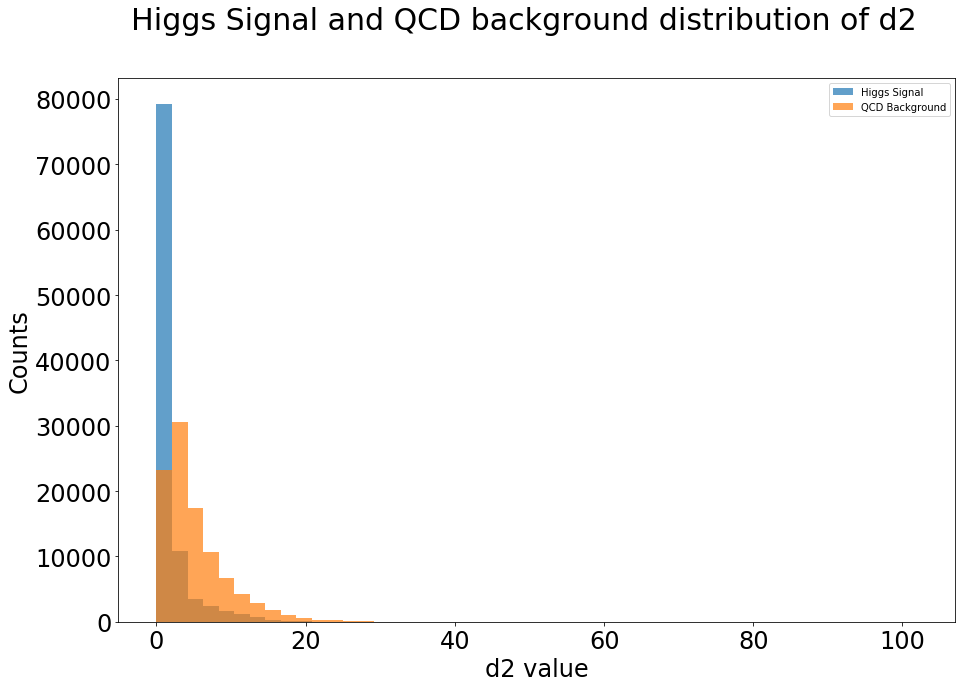

In [84]:
plt.suptitle('Higgs Signal and QCD background distribution of d2', fontsize=30)
plt.xlabel('d2 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['d2'], bins = np.linspace(0,102,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['d2'], bins = np.linspace(0,102,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

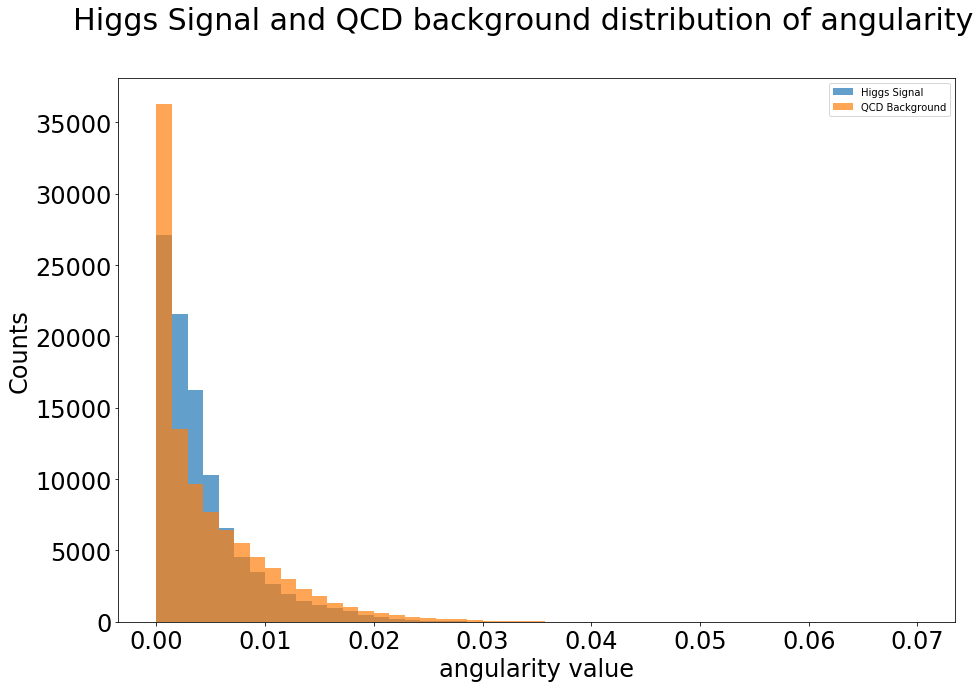

In [85]:
plt.suptitle('Higgs Signal and QCD background distribution of angularity', fontsize=30)
plt.xlabel('angularity value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['angularity'], bins = np.linspace(0,0.07,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['angularity'], bins = np.linspace(0,0.07,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

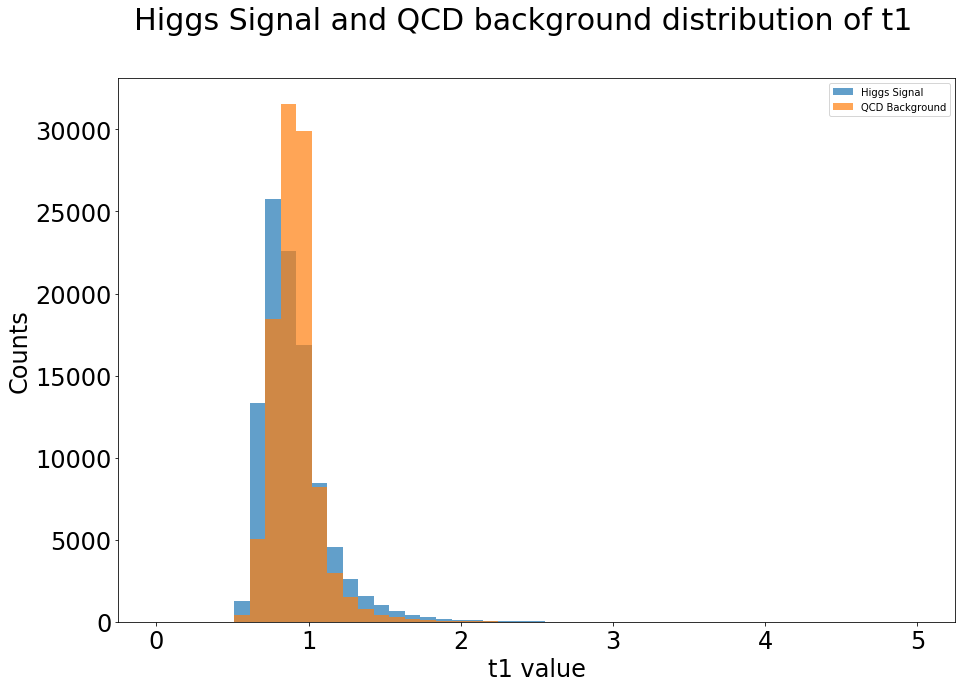

In [86]:
plt.suptitle('Higgs Signal and QCD background distribution of t1', fontsize=30)
plt.xlabel('t1 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['t1'], bins = np.linspace(0,5,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['t1'], bins = np.linspace(0,5,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

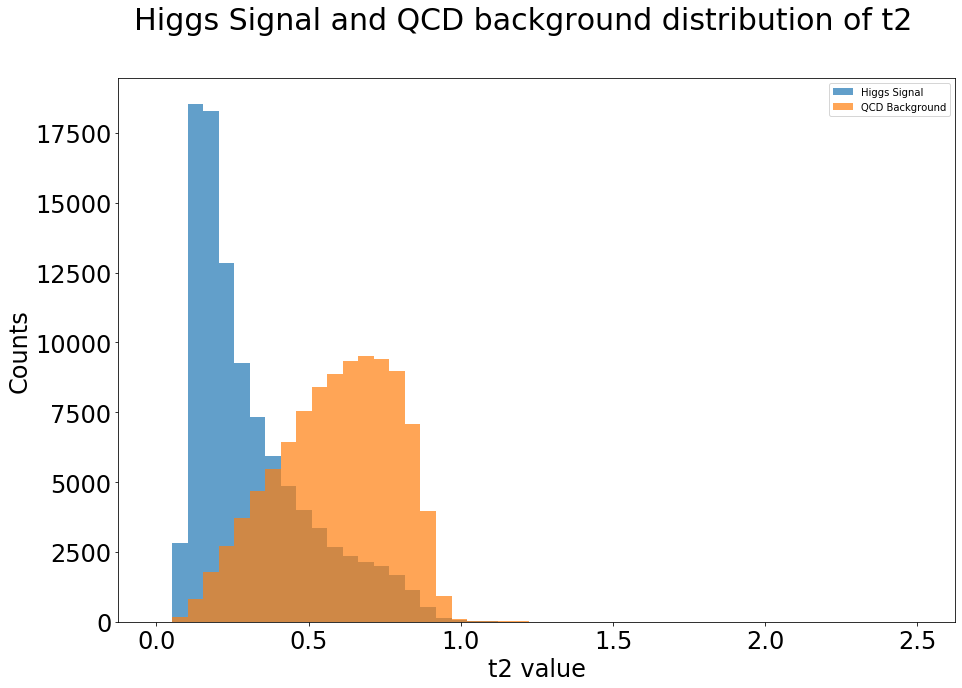

In [87]:
plt.suptitle('Higgs Signal and QCD background distribution of t2', fontsize=30)
plt.xlabel('t2 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['t2'], bins = np.linspace(0,2.5,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['t2'], bins = np.linspace(0,2.5,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

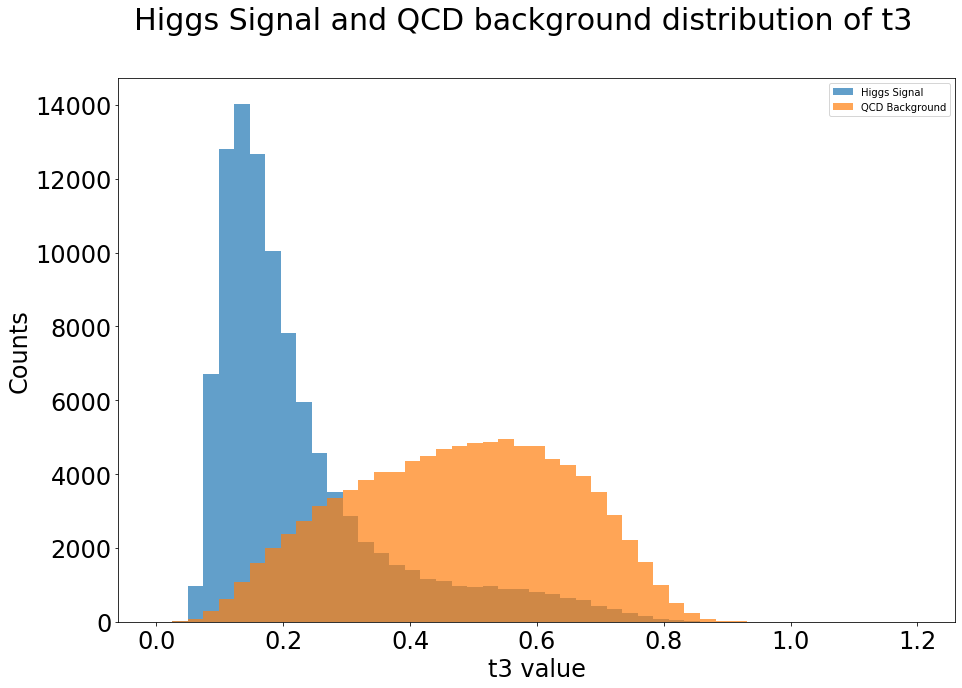

In [88]:
plt.suptitle('Higgs Signal and QCD background distribution of t3', fontsize=30)
plt.xlabel('t3 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['t3'], bins = np.linspace(0,1.2,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['t3'], bins = np.linspace(0,1.2,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

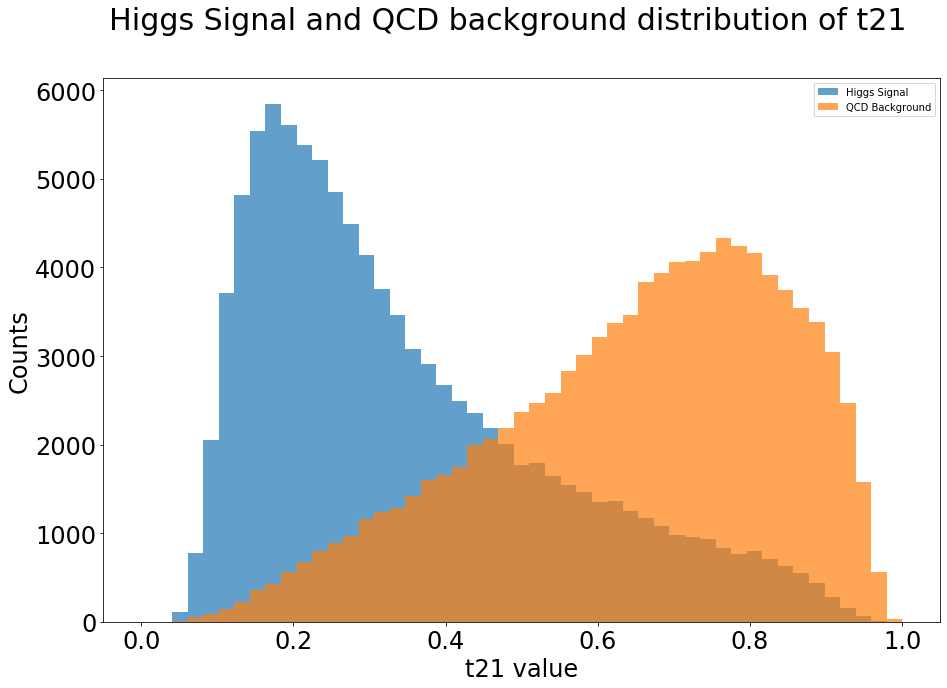

In [89]:
plt.suptitle('Higgs Signal and QCD background distribution of t21', fontsize=30)
plt.xlabel('t21 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['t21'], bins = np.linspace(0,1,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['t21'], bins = np.linspace(0,1,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

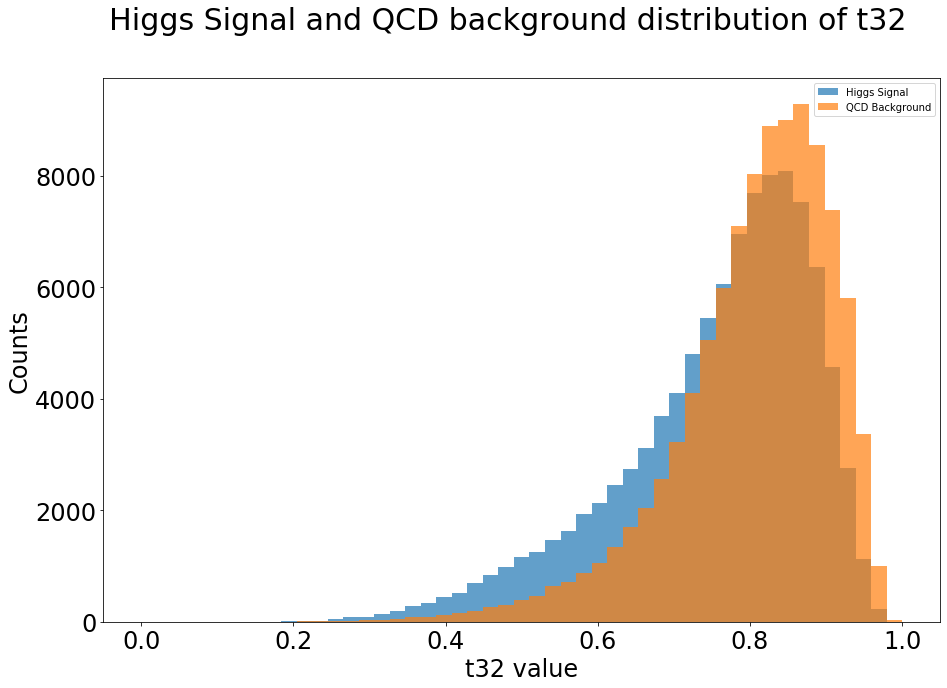

In [90]:
plt.suptitle('Higgs Signal and QCD background distribution of t32', fontsize=30)
plt.xlabel('t32 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['t32'], bins = np.linspace(0,1,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['t32'], bins = np.linspace(0,1,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

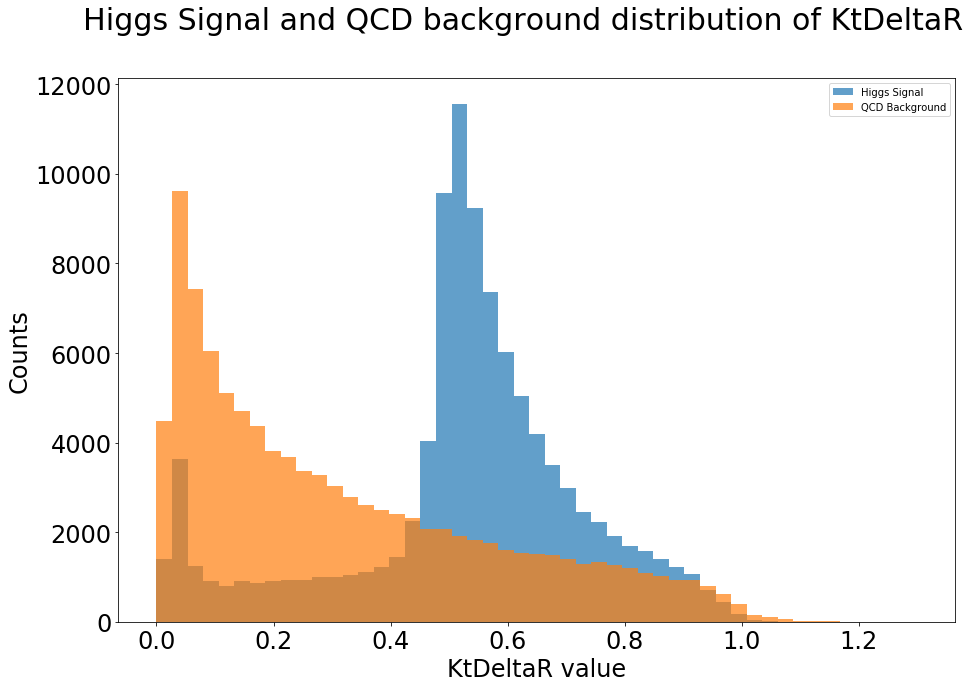

In [91]:
plt.suptitle('Higgs Signal and QCD background distribution of KtDeltaR', fontsize=30)
plt.xlabel('KtDeltaR value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['KtDeltaR'], bins = np.linspace(0,1.3,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['KtDeltaR'], bins = np.linspace(0,1.3,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

I've already done the process of eyeballing which of the features are significant in Lab 05, and my findings were follows:

**pt, mass, ee2, t2, t3, t21 and KtDeltaR** have strong discriminating power.
<br>**eta, ee3, d2, angularity, t1 and t32** have weak discriminating power.
<br>**phi** has no discriminating power at all.

However, just like what happened with **mass**, eyeballing doesn't get us the best answer so we will do iterations for each of the features like we did for mass.

First, we'll generalize the code we did for the mass iteration into a function so it could be used for all other features as well.
<br>We'll split the range of each feature into 100 steps instead of 330 due to the long time it takes to run through the code.

In [203]:
def find_max_sigma(label, lower, upper):
    sigma = 0
    trs_lo = lower
    trs_hi = upper
    step = (upper - lower) / 100
    for i in np.arange(100):
        for j in np.arange(i + 1,100):
            lo = lower + step * i
            hi = lower + step * j
            p_higgs = len(data_higgs[(data_higgs[label] >= lo) & (data_higgs[label] <= hi)][label]) / 100000
            p_qcd = len(data_qcd[(data_qcd[label] >= lo) & (data_qcd[label] <= hi)][label]) / 100000
            if p_qcd > 0 :
                test = 100 * p_higgs / ((20000 * p_qcd) ** 0.5)
                if test > sigma:
                    sigma = test
                    trs_lo = lo
                    trs_hi = hi
    return [sigma, trs_lo, trs_hi]

First, we try it on mass to see if the results are similar.

In [204]:
search_mass = find_max_sigma('mass',0 , 330)
search_mass

[2.7421381400341107, 122.1, 128.7]

The cut range is similar with what we did previously, but with a slightly smaller highest significance due to larger steps.

But perhaps, there's a even higher expected significance if we cut mass by values between intergers:

In [247]:
search_mass_finer = find_max_sigma('mass', 124, 127)
search_mass_finer

[3.294765217873512, 124.84, 126.7]

It appears that there is! We have raised our highest expected significance to **3.295 sigma** by fining the cut.

Next, we will try on features I eyeballed as strong discriminating and see what the higest significance for each of them are.
<br>After each search, we'll try a finer search to see if we can get an even better expected significance, like we did with math.

In [205]:
search_t21 = find_max_sigma('t21',0 ,1)
search_t21

[1.5082240356251932, 0.05, 0.26]

In [243]:
search_t21_finer = find_max_sigma('t21', 0.05, 0.25)
search_t21_finer

[1.508821308962953, 0.05, 0.248]

In [207]:
search_ee2 = find_max_sigma('ee2',0 ,0.5)
search_ee2

[1.1908876364582064, 0.12, 0.17]

In [244]:
search_ee2_finer = find_max_sigma('ee2', 0.12, 0.17)
search_ee2_finer

[1.1945288853026466, 0.121, 0.1685]

In [208]:
search_pt = find_max_sigma('pt', 250, 500)
search_pt

[0.7518705682880084, 465.0, 487.5]

In [245]:
search_pt_finer = find_max_sigma('pt', 465, 487.5)
search_pt_finer

[0.7640864667582478, 469.05, 486.375]

In [237]:
search_KtDeltaR = find_max_sigma('KtDeltaR', 0, 1.3)
search_KtDeltaR

[1.0895466605941049, 0.468, 0.7280000000000001]

In [246]:
search_KtDeltaR_finer = find_max_sigma('KtDeltaR', 0.468, 0.728)
search_KtDeltaR_finer

[1.0893840515684772, 0.468, 0.7254]

Unfortunately, it seems that none of the features we see as discriminating have a highest expected significance when cutted as high as that of mass cut.

For completeness, we'll check on some less discriminating features: 

In [213]:
search_eta = find_max_sigma('eta', math.pi * (-1), math.pi)
search_eta

[0.7432053265527764, -1.5079644737231006, 1.5707963267948966]

In [214]:
search_phi = find_max_sigma('phi', math.pi * (-1), math.pi)
search_phi

[0.7036512243083366, -3.141592653589793, 3.0787608005179976]

**phi** was the least discriminating features we see from the histograms and it's no wonder it has a highest expected significance about the same as that of the entire dataset.

In [238]:
search_ee3 = find_max_sigma('ee3',0, 0.12)
search_ee3

[0.9260480166653233, 0.0012, 0.005999999999999999]

In [216]:
search_d2 = find_max_sigma('d2',0 , 102)
search_d2

[1.656359266335067, 0.0, 1.02]

**Now this is a surprise!** d2 is actually a strongly discriminant data, but because of the poor choice of plotting range I mistook it as a weak discriminating feature.

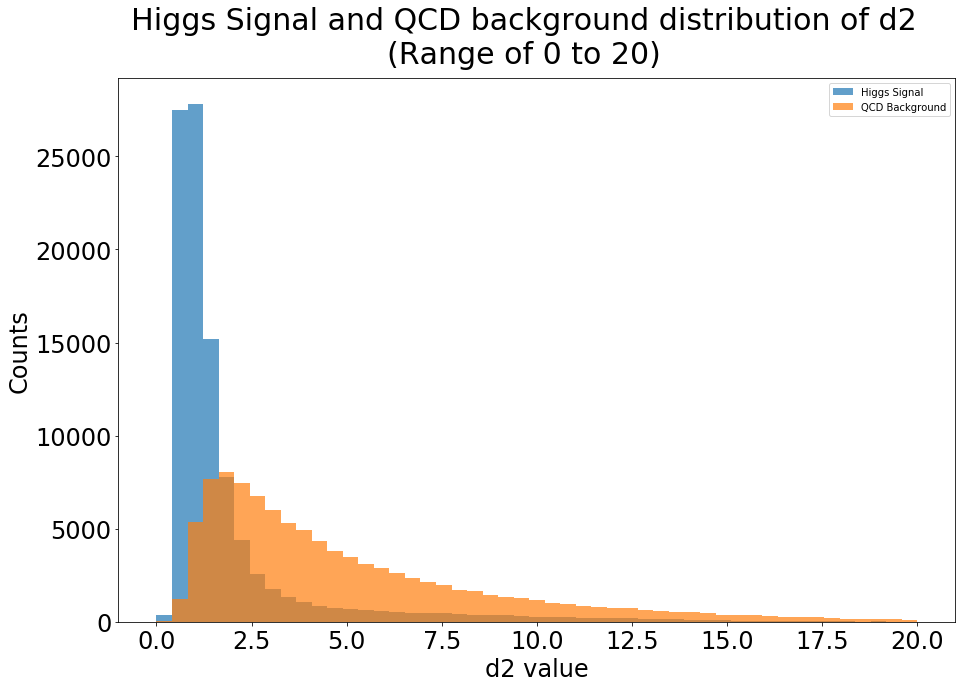

In [241]:
plt.suptitle('Higgs Signal and QCD background distribution of d2\n(Range of 0 to 20)', fontsize=30)
plt.xlabel('d2 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['d2'], bins = np.linspace(0,20,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['d2'], bins = np.linspace(0,20,50), alpha = 0.7, label = 'QCD Background')

plt.legend()
plt.show()

Since [0, 1.02] is already the smallest step of the iteration, we'll do the same steps again for a smaller range of data.

In [218]:
search_d2_finer = find_max_sigma('d2',0 ,2)
search_d2_finer

[1.7639037594043911, 0.34, 0.8200000000000001]

In [217]:
search_angularity = find_max_sigma('angularity',0, 0.07)
search_angularity

[0.7098138857387619, 0.0, 0.021000000000000005]

In [220]:
search_t1 = find_max_sigma('t1', 0, 5)
search_t1

[0.7071103170298271, 0.5, 3.5]

t2 and t3 are not weak discriminating data.
<br>However we knew from the lecture that n-subjettiness itself does not confidently suggest the number of sub jets, but rather the ratios (t21 and t32).
<br>Therefore, we're placing them down here as values of lower importance.
<br>We'll find a finer cut for them nonetheless.

In [223]:
search_t2 = find_max_sigma('t2', 0, 2.5)
search_t2

[1.6818987276611987, 0.07500000000000001, 0.2]

In [248]:
search_t2_finer = find_max_sigma('t2', 0.075, 0.2)
search_t2_finer

[1.6928566819266395, 0.075, 0.1925]

In [224]:
search_t3 = find_max_sigma('t3', 0, 1.2)
search_t3

[1.7527775540700101, 0.06, 0.168]

In [250]:
search_t3_finer = find_max_sigma('t3', 0.06, 0.168)
search_t3_finer

[1.7595578643842158, 0.061079999999999995, 0.16152000000000002]

In [225]:
search_t32 = find_max_sigma('t32', 0, 1)
search_t32

[0.7156072968773007, 0.08, 0.92]

### Of all the features aside from mass, none of them have a discriminating power as strong or stronger than mass,<br>which has an expected signifiance over 3 sigma.

The second most discriminating feature is t2, which has a highest expected signifiance of 1.763 sigma.

## B

We will now cut our data with our optimal mass cut.
<br>But first we should decide if we should use the interger cut ([124, 127]), or the finer cut ([124.84, 126.7])
<br>A finer cut has better expected significance but we may risk not having enough data included.

In [253]:
print(len(data_higgs[(data_higgs['mass'] <= 127) & (data_higgs['mass'] >= 124)]['mass']))
print(len(data_qcd[(data_qcd['mass'] <= 127) & (data_qcd['mass'] >= 124)]['mass']))

53394
1457


In [254]:
print(len(data_higgs[(data_higgs['mass'] <= 126.7) & (data_higgs['mass'] >= 124.84)]['mass']))
print(len(data_qcd[(data_qcd['mass'] <= 126.7) & (data_qcd['mass'] >= 124.84)]['mass']))

43710
880


It appears that the finer cut is not too bad of a choice, we will thus use it to plot our stacked histogram for the other features.

The process is the same, except the data is now selected by our mass cut:

In [255]:
data_higgs_cut = data_higgs[(data_higgs['mass'] <= 126.7) & (data_higgs['mass'] >= 124.84)]
data_higgs_cut

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
5,475.798645,1.678998,0.309122,125.676535,0.144900,0.001321,0.434366,0.000124,1.089226,0.095011,0.086523,0.087228,0.910669,0.507167
9,484.359373,1.076703,1.851916,125.191446,0.135803,0.001388,0.554000,0.000601,1.028446,0.107116,0.086189,0.104153,0.804630,0.494019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,476.714821,0.017553,2.663535,125.900800,0.136183,0.001918,0.759438,0.004177,0.784562,0.141923,0.116186,0.180895,0.818656,0.529387
99991,329.146295,-0.345632,2.028976,126.248441,0.222235,0.007895,0.719282,0.006825,0.865370,0.196993,0.096368,0.227640,0.489193,0.719228
99993,438.966552,1.232495,3.024192,126.430944,0.160702,0.004927,1.187090,0.000714,1.234348,0.395782,0.157371,0.320641,0.397621,0.499350
99994,483.898015,-0.216674,-0.796111,125.629127,0.125778,0.001278,0.642064,0.002957,0.779179,0.101895,0.092026,0.130772,0.903143,0.529690


In [256]:
data_qcd_cut = data_qcd[(data_qcd['mass'] <= 126.7) & (data_qcd['mass'] >= 124.84)]
data_qcd_cut

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
84,320.287154,0.592017,-0.740326,126.608757,0.196841,0.014375,1.884845,0.018676,0.872732,0.627275,0.484783,0.718749,0.772839,0.792751
376,462.515807,-0.508903,-2.267244,126.529379,0.131296,0.005339,2.359028,0.006738,0.880119,0.614617,0.473347,0.698334,0.770150,0.574838
473,400.415084,0.875064,-1.535340,125.743672,0.173533,0.007015,1.342427,0.002793,1.076209,0.406983,0.357052,0.378164,0.877314,0.493729
505,394.826603,0.567304,-2.068393,124.988221,0.158259,0.007494,1.890607,0.008773,0.916333,0.401566,0.347699,0.438232,0.865857,0.523633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99759,479.033995,1.133055,-1.422466,125.533438,0.132053,0.004433,1.925208,0.001923,0.897233,0.425350,0.334604,0.474068,0.786657,0.410267
99784,459.536618,-0.499708,-1.152657,126.510265,0.149795,0.005298,1.576087,0.004292,1.230994,0.708772,0.289670,0.575772,0.408694,0.365549
99847,402.149711,-1.966828,-1.071939,126.040417,0.148631,0.006717,2.045608,0.000369,0.821623,0.413257,0.326562,0.502977,0.790216,0.702504
99869,349.704744,0.430005,2.152565,125.272633,0.165878,0.010155,2.224870,0.016373,0.850429,0.465605,0.291079,0.547494,0.625163,0.522642


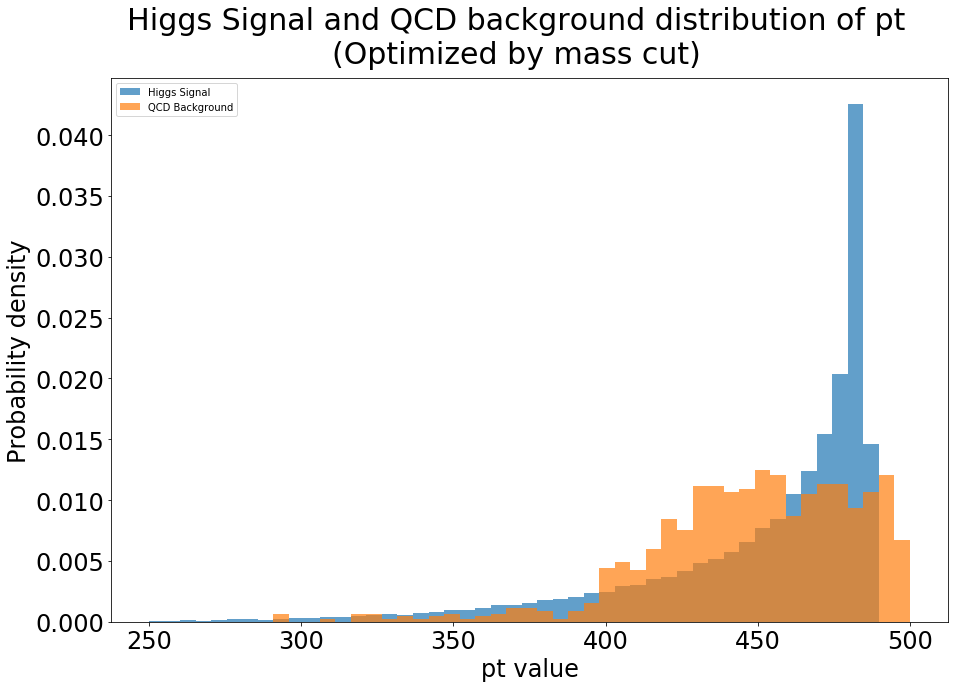

In [283]:
plt.suptitle('Higgs Signal and QCD background distribution of pt\n(Optimized by mass cut)', fontsize=30)
plt.xlabel('pt value', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs_cut['pt'], bins = np.linspace(250,500,50), density = True, alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd_cut['pt'], bins = np.linspace(250,500,50), density = True, alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

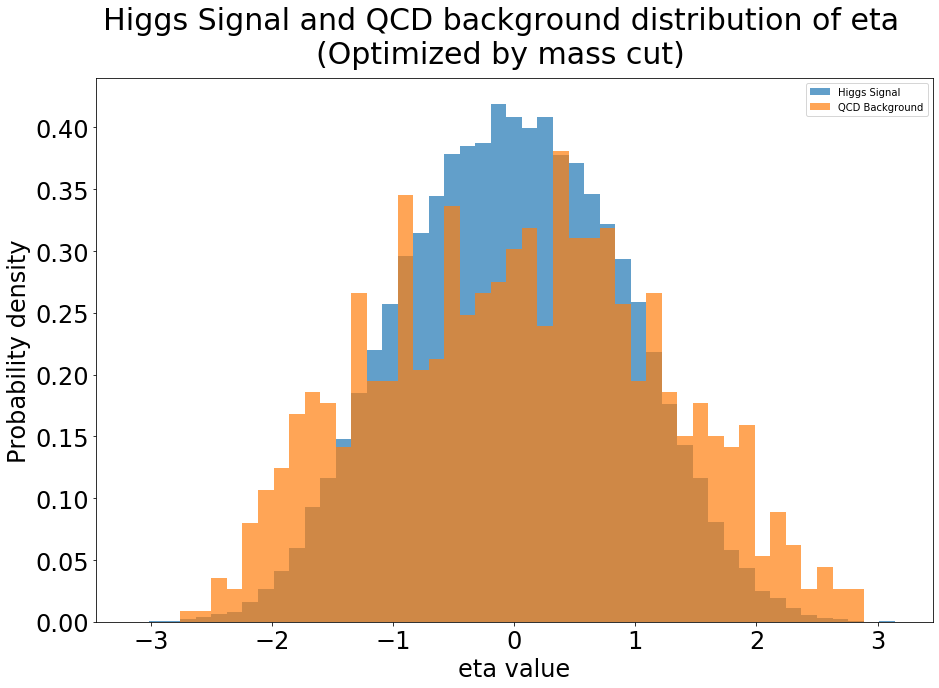

In [282]:
plt.suptitle('Higgs Signal and QCD background distribution of eta\n(Optimized by mass cut)', fontsize=30)
plt.xlabel('eta value', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs_cut['eta'], bins = np.linspace(math.pi * -1,math.pi,50), density = True, alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd_cut['eta'], bins = np.linspace(math.pi * -1,math.pi,50), density = True, alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

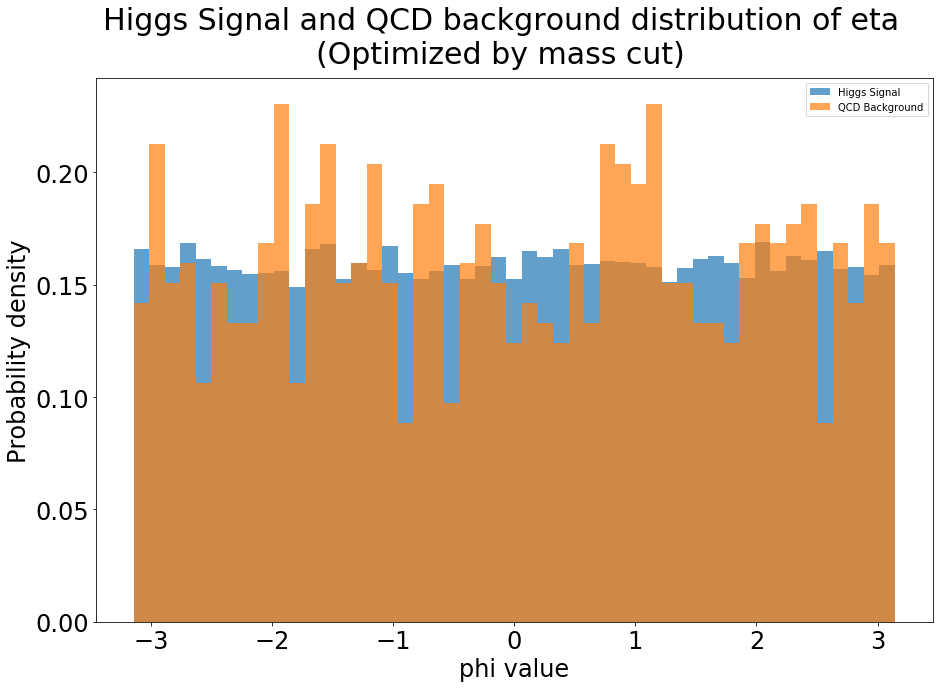

In [281]:
plt.suptitle('Higgs Signal and QCD background distribution of phi\n(Optimized by mass cut)', fontsize=30)
plt.xlabel('phi value', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs_cut['phi'], bins = np.linspace(math.pi * -1,math.pi,50), density = True, alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd_cut['phi'], bins = np.linspace(math.pi * -1,math.pi,50), density = True, alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

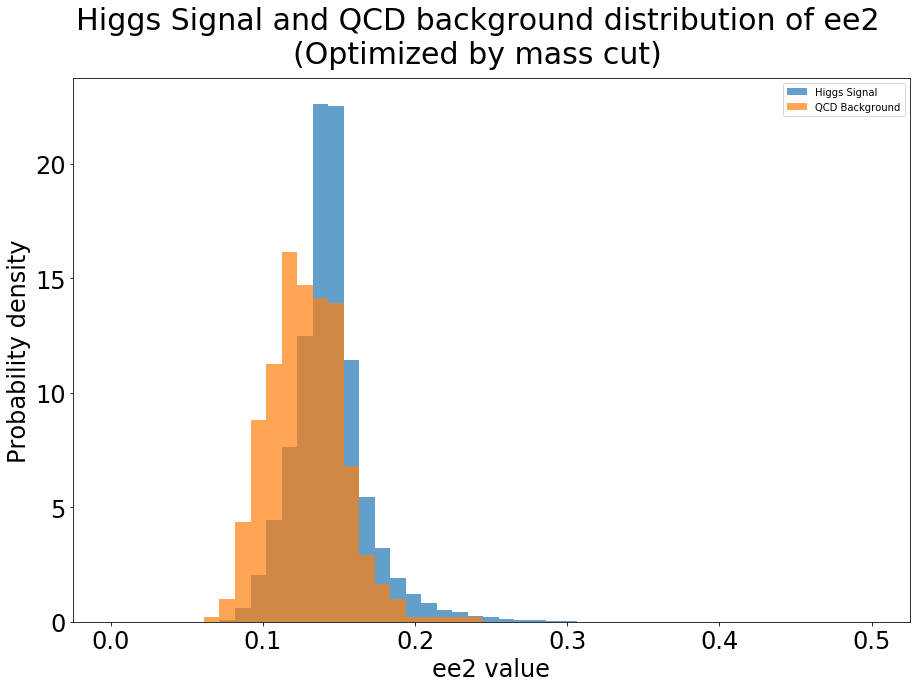

In [284]:
plt.suptitle('Higgs Signal and QCD background distribution of ee2\n(Optimized by mass cut)', fontsize=30)
plt.xlabel('ee2 value', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs_cut['ee2'], bins = np.linspace(0,0.5,50), density = True, alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd_cut['ee2'], bins = np.linspace(0,0.5,50), density = True, alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

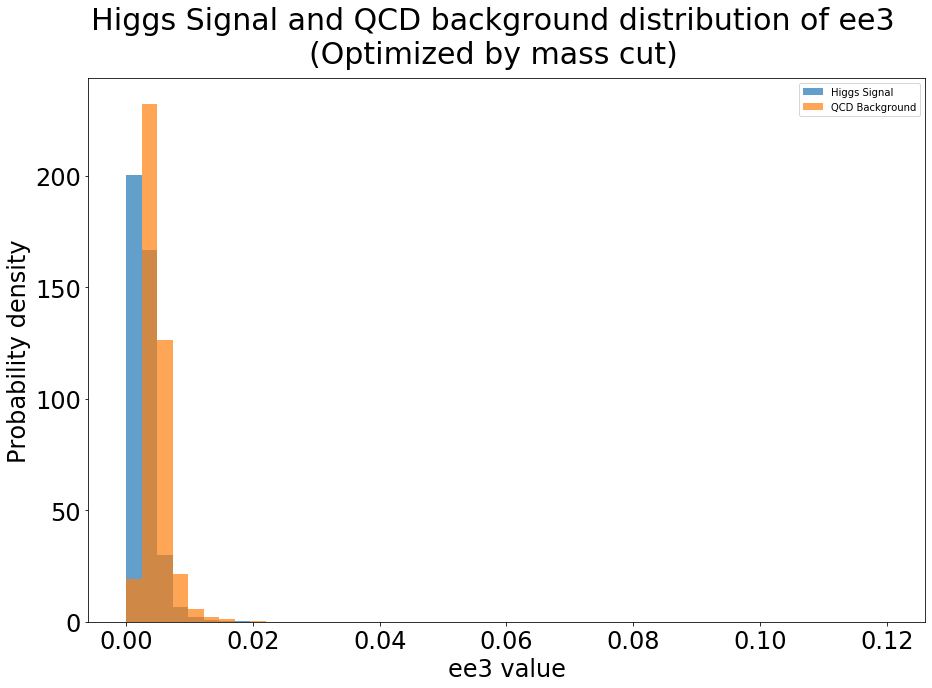

In [295]:
plt.suptitle('Higgs Signal and QCD background distribution of ee3\n(Optimized by mass cut)', fontsize=30)
plt.xlabel('ee3 value', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs_cut['ee3'], bins = np.linspace(0,0.12,50), density = True, alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd_cut['ee3'], bins = np.linspace(0,0.12,50), density = True, alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

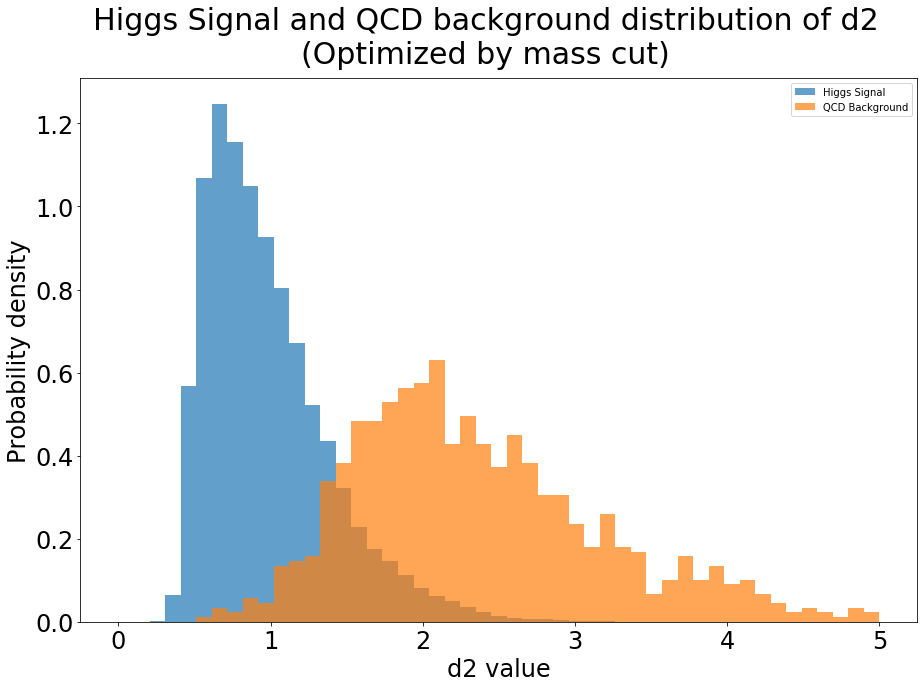

In [297]:
plt.suptitle('Higgs Signal and QCD background distribution of d2\n(Optimized by mass cut)', fontsize=30)
plt.xlabel('d2 value', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs_cut['d2'], bins = np.linspace(0,5,50), density = True, alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd_cut['d2'], bins = np.linspace(0,5,50), density = True, alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

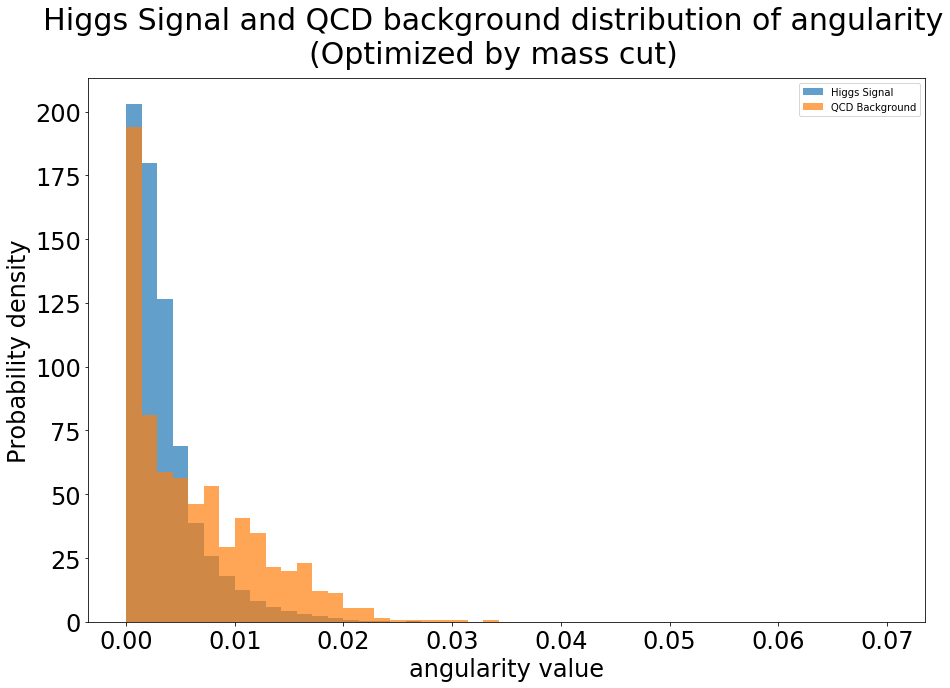

In [298]:
plt.suptitle('Higgs Signal and QCD background distribution of angularity\n(Optimized by mass cut)', fontsize=30)
plt.xlabel('angularity value', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs_cut['angularity'], bins = np.linspace(0,0.07,50), density = True, alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd_cut['angularity'], bins = np.linspace(0,0.07,50), density = True, alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

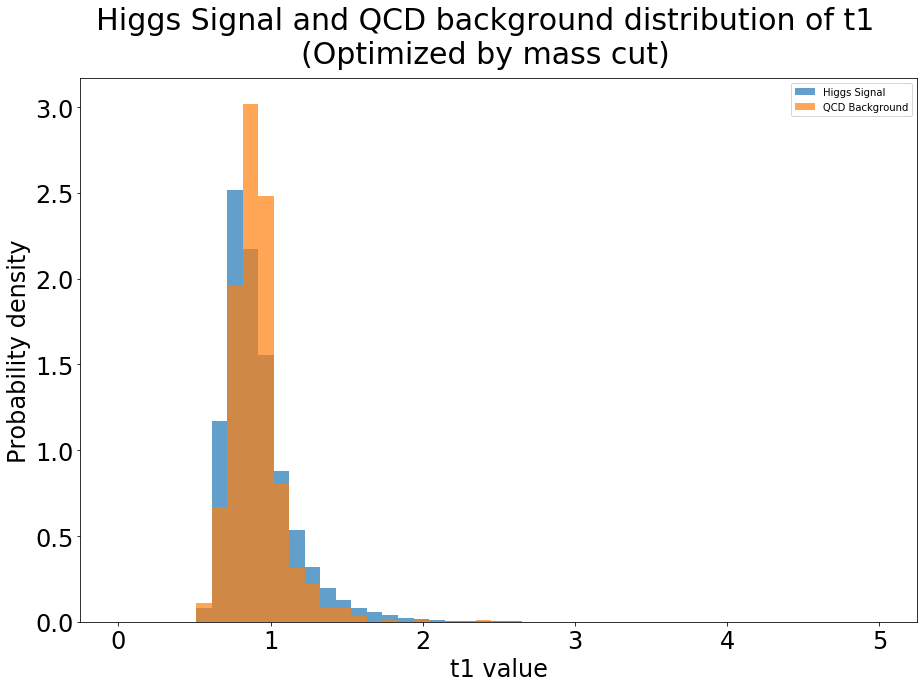

In [299]:
plt.suptitle('Higgs Signal and QCD background distribution of t1\n(Optimized by mass cut)', fontsize=30)
plt.xlabel('t1 value', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs_cut['t1'], bins = np.linspace(0,5,50), alpha = 0.7, density = True, label = 'Higgs Signal')
plt.hist(data_qcd_cut['t1'], bins = np.linspace(0,5,50), alpha = 0.7, density = True, label = 'QCD Background')
plt.legend()
plt.show()

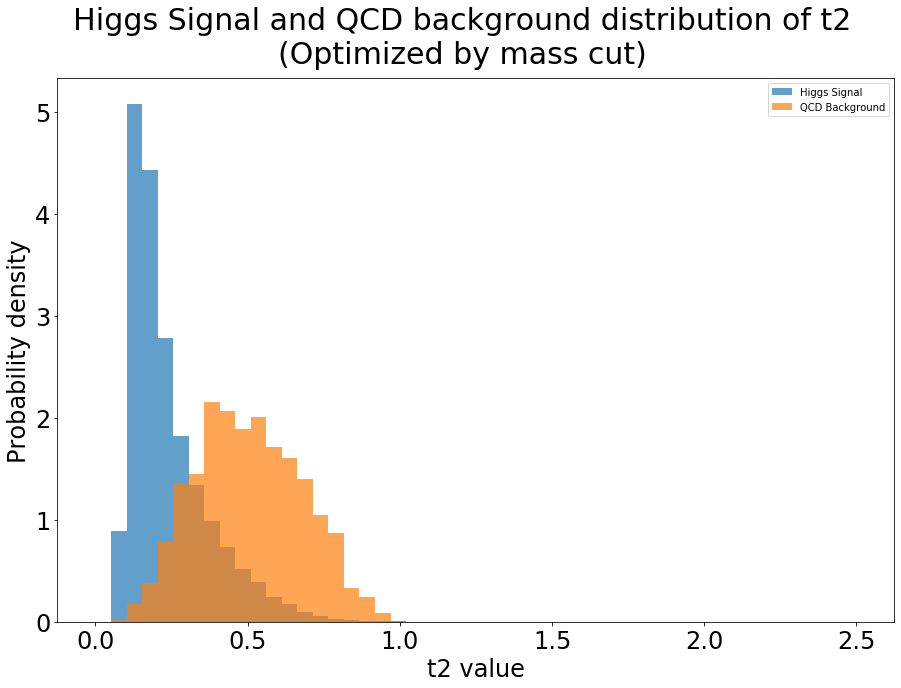

In [300]:
plt.suptitle('Higgs Signal and QCD background distribution of t2\n(Optimized by mass cut)', fontsize=30)
plt.xlabel('t2 value', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs_cut['t2'], bins = np.linspace(0,2.5,50), alpha = 0.7, density = True, label = 'Higgs Signal')
plt.hist(data_qcd_cut['t2'], bins = np.linspace(0,2.5,50), alpha = 0.7, density = True,label = 'QCD Background')
plt.legend()
plt.show()

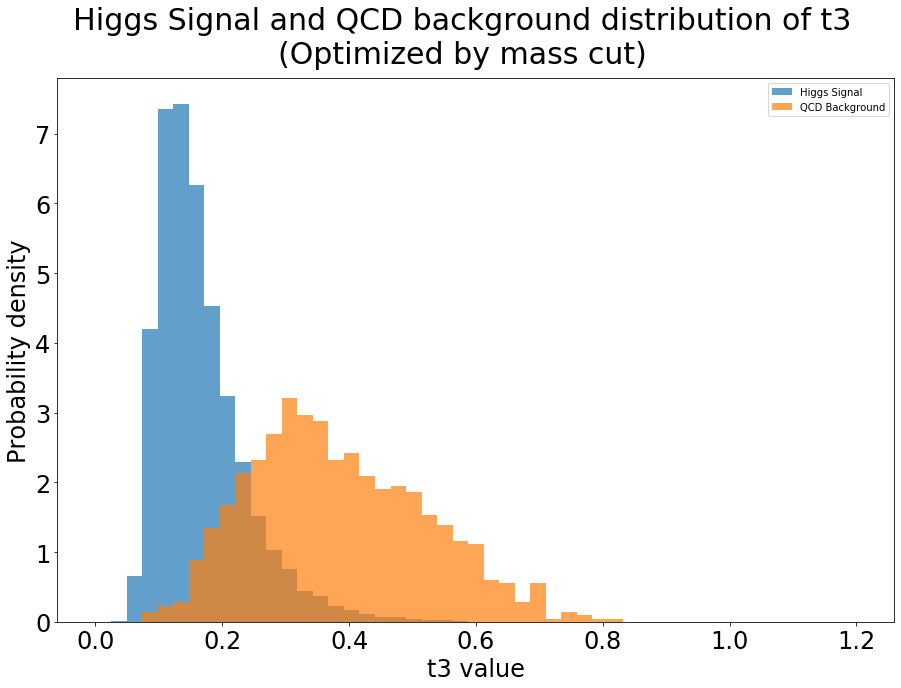

In [301]:
plt.suptitle('Higgs Signal and QCD background distribution of t3\n(Optimized by mass cut)', fontsize=30)
plt.xlabel('t3 value', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs_cut['t3'], bins = np.linspace(0,1.2,50), density = True, alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd_cut['t3'], bins = np.linspace(0,1.2,50), density = True, alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

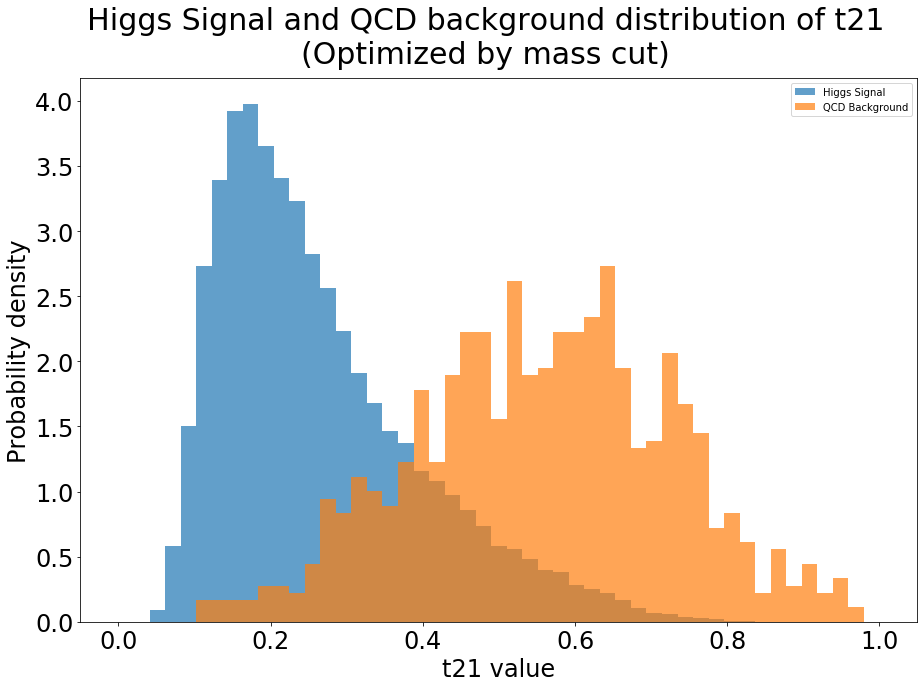

In [303]:
plt.suptitle('Higgs Signal and QCD background distribution of t21\n(Optimized by mass cut)', fontsize=30)
plt.xlabel('t21 value', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs_cut['t21'], bins = np.linspace(0,1,50), density = True, alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd_cut['t21'], bins = np.linspace(0,1,50), density = True, alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

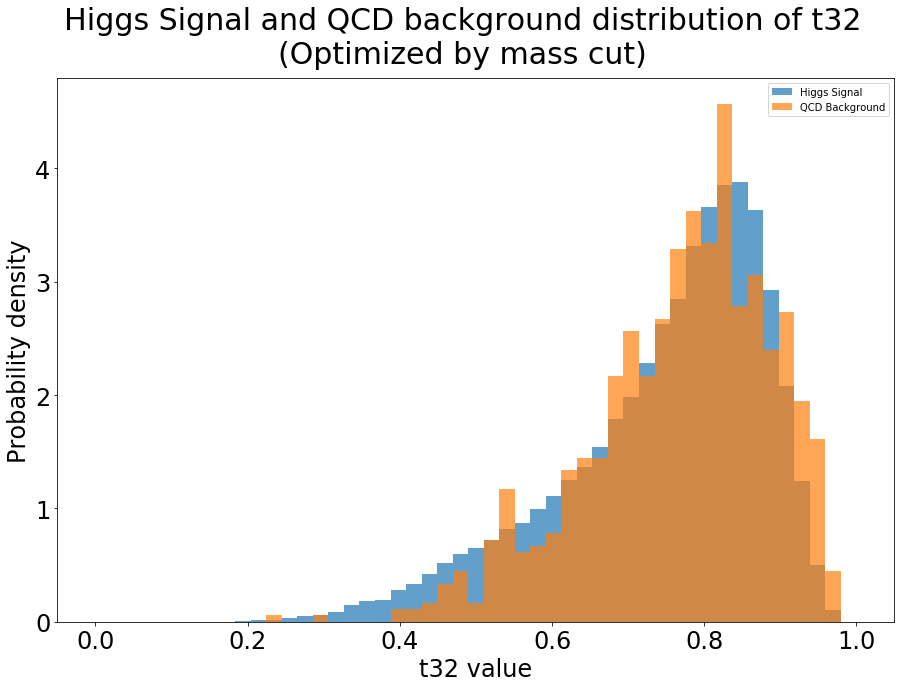

In [304]:
plt.suptitle('Higgs Signal and QCD background distribution of t32\n(Optimized by mass cut)', fontsize=30)
plt.xlabel('t32 value', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs_cut['t32'], bins = np.linspace(0,1,50), density = True, alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd_cut['t32'], bins = np.linspace(0,1,50), density = True, alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

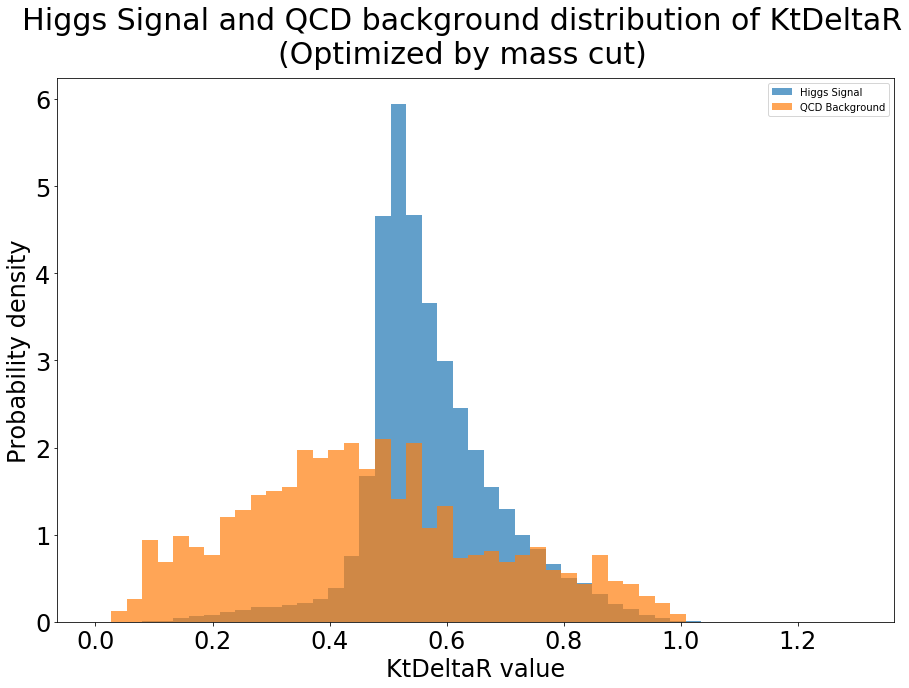

In [305]:
plt.suptitle('Higgs Signal and QCD background distribution of KtDeltaR\n(Optimized by mass cut)', fontsize=30)
plt.xlabel('KtDeltaR value', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs_cut['KtDeltaR'], bins = np.linspace(0,1.3,50), density = True, alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd_cut['KtDeltaR'], bins = np.linspace(0,1.3,50), density = True, alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

Of all the plotted graphs, it would appear that KtDeltaR is a good choice as an additional feature to further improved expected significance, as KtDeltaR's histogram has the most different distribution of background after the cut.

# 4

An idea of optimizing with two features is to use the range of the highest expected significance of both values.
<br>With mass being the one with the highest expected significance, it's best to use mass as one of the optimization cuts.

To avoid excessive copy & paste we will also bundle the code into a function:

In [312]:
def sigma_twocut(search_other, label):
    lo = search_other[1]
    hi = search_other[2]
    p_higgs = len(data_higgs[(data_higgs[label] >= lo) & (data_higgs[label] <= hi) & (data_higgs['mass'] >= 123.84) & (data_higgs['mass'] <= 126.7)]['pt']) / 100000
    p_qcd = len(data_qcd[(data_qcd[label] >= lo) & (data_qcd[label] <= hi) & (data_qcd['mass'] >= 123.84) & (data_qcd['mass'] <= 126.7)]['pt']) / 100000
    return 100 * p_higgs / ((20000 * p_qcd) ** 0.5)

We'll check with the mass itself to see if we get the same expected signifiance.

In [313]:
sigma_twocut(search_mass_finer, 'mass')

3.294765217873512

It works, we'll now use it on other discriminating features.

In [314]:
sigma_twocut(search_t21_finer, 't21')

8.059096729219045

In [315]:
sigma_twocut(search_ee2_finer, 'ee2')

3.01399021232651

In [316]:
sigma_twocut(search_pt_finer, 'pt')

3.400007766721303

In [317]:
sigma_twocut(search_KtDeltaR_finer, 'KtDeltaR')

4.252525882865307

In [318]:
sigma_twocut(search_d2_finer, 'd2')

14.951095853556092

In [320]:
sigma_twocut(search_t2_finer, 't2')

8.776992158555878

In [321]:
sigma_twocut(search_t3_finer, 't3')

9.991772371556507

Just to be safe, we'll try the pair cuts on features with weak discrimination:

In [322]:
sigma_twocut(search_eta, 'eta')

3.176065274769331

In [323]:
sigma_twocut(search_phi, 'phi')

3.0533156788918965

In [324]:
sigma_twocut(search_ee3, 'ee3')

3.1212411159222233

In [325]:
sigma_twocut(search_angularity, 'angularity')

3.083883051049982

In [326]:
sigma_twocut(search_t1, 't1')

3.0701693274243507

In [327]:
sigma_twocut(search_t32, 't32')

3.0788770096062836

No wonder. Pairing mass cut with the cut from a non-discriminating feature only worsens the optimization. (Expected significance actually went down!)

Of all the discriminating values, it would appear that **mass and d2** make the best pair of features cuts.
<br>This choice allows the expected significance to increase from **0.707 sigma to 14.951** sigma. This is a very large improvement!

# 5

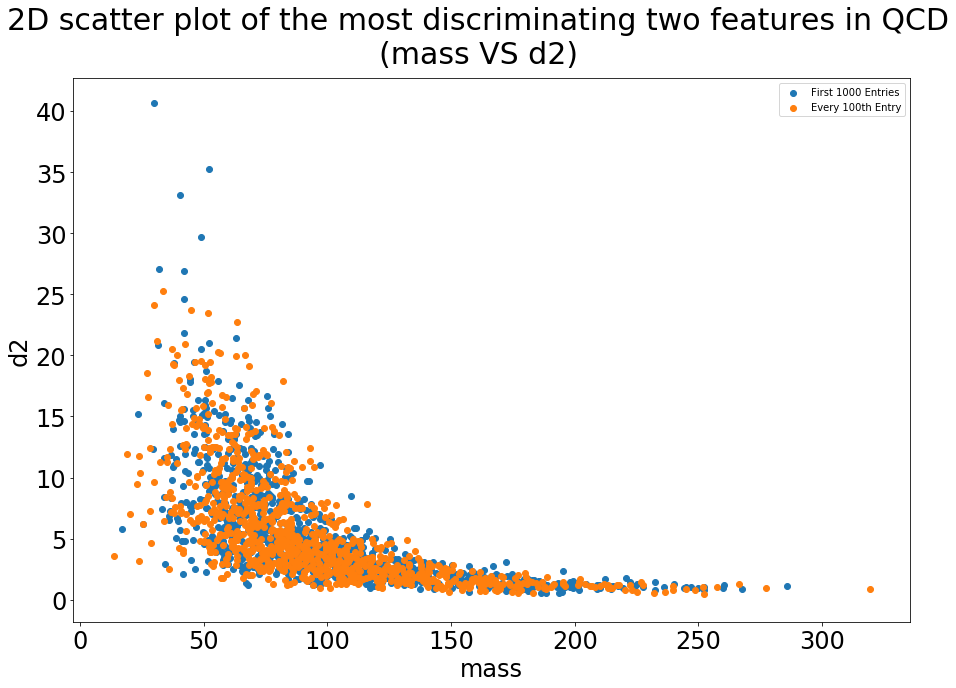

In [351]:
plt.suptitle('2D scatter plot of the most discriminating two features in QCD\n(mass VS d2)', fontsize=30)
plt.xlabel('mass', fontsize = 24)
plt.ylabel('d2', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['mass'][0:1000], data_qcd['d2'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['mass'][0::100], data_qcd['d2'][0::100], label = "Every 100th Entry") 
#plt.scatter(data_qcd['mass'], data_qcd['d2'], s = 1) 
plt.legend()
plt.show()

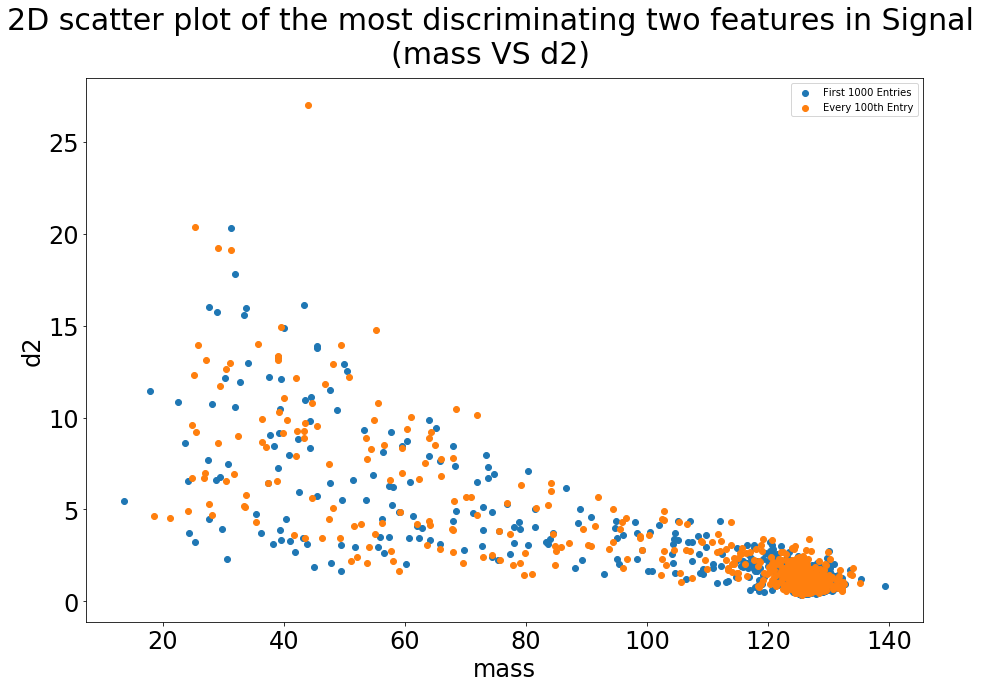

In [334]:
plt.suptitle('2D scatter plot of the most discriminating two features in Signal\n(mass VS d2)', fontsize=30)
plt.xlabel('mass', fontsize = 24)
plt.ylabel('d2', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_higgs['mass'][0:1000], data_higgs['d2'][0:1000], label = "First 1000 Entries")
plt.scatter(data_higgs['mass'][0::100], data_higgs['d2'][0::100], label = "Every 100th Entry") 
#plt.scatter(data_qcd['mass'], data_qcd['d2'], label = "Every 100th Entry") 
plt.legend()
plt.show()

It appears there is some kind of exponential relationship between the two values.

In [353]:
fit = scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(b*t) + c, data_qcd['mass'], data_qcd['d2'], p0 =(0, -1, 0))
fit

(array([ 2.25592420e+01, -1.76169837e-02,  1.54539905e-01]),
 array([[ 1.52949105e-02, -1.56549935e-05,  2.50627179e-03],
        [-1.56549935e-05,  2.57895215e-08, -6.26585546e-06],
        [ 2.50627179e-03, -6.26585546e-06,  1.91066271e-03]]))

We seem to be able to reach a fit. Let's plug it back into the plot.

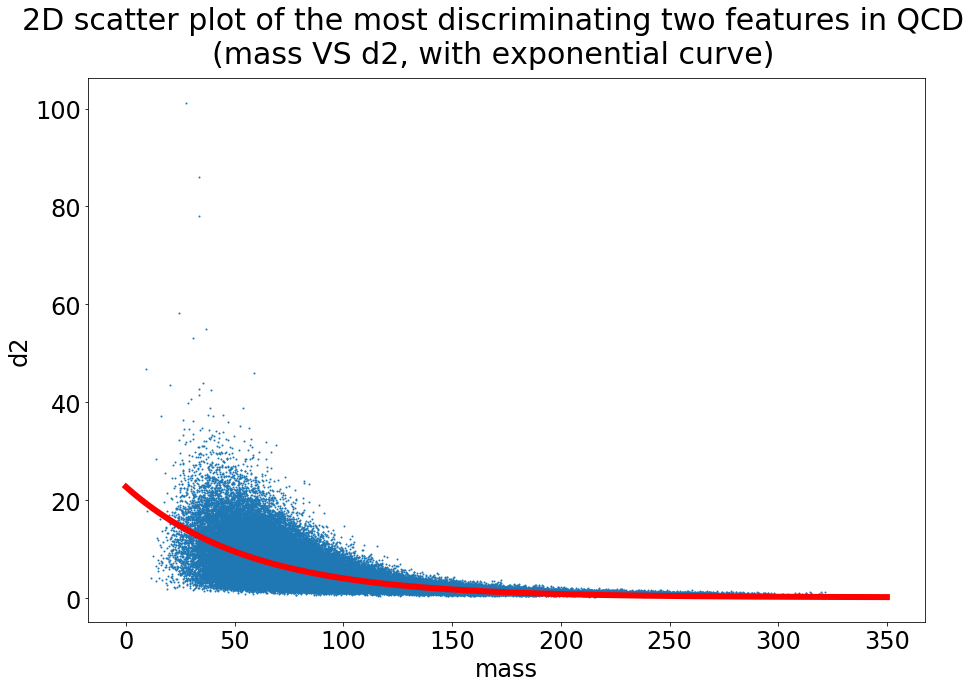

In [354]:
plt.suptitle('2D scatter plot of the most discriminating two features in QCD\n(mass VS d2, with exponential curve)', fontsize=30)
plt.xlabel('mass', fontsize = 24)
plt.ylabel('d2', fontsize = 24)
plt.tick_params(labelsize = 24)
#plt.scatter(data_qcd['mass'][0:1000], data_qcd['d2'][0:1000], label = "First 1000 Entries")
#plt.scatter(data_qcd['mass'][0::100], data_qcd['d2'][0::100], label = "Every 100th Entry") 
plt.scatter(data_qcd['mass'], data_qcd['d2'], s=1) 
x = np.linspace(0,350,10000)
plt.plot(x, fit[0][0] * np.exp(fit[0][1]*(x)) + fit[0][2], color = 'red', linewidth = 6)
plt.show()

Let's try the same for the signal:

In [357]:
fit_s = scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(b*t) + c, data_higgs['mass'], data_higgs['d2'], p0 =(0, -1, 0))
fit_s

(array([ 2.27321464e+01, -6.05283457e-03, -9.52440854e+00]),
 array([[ 1.26390258e-01,  6.54776556e-05, -1.46809435e-01],
        [ 6.54776556e-05,  3.45152908e-08, -7.68083398e-05],
        [-1.46809435e-01, -7.68083398e-05,  1.71498910e-01]]))

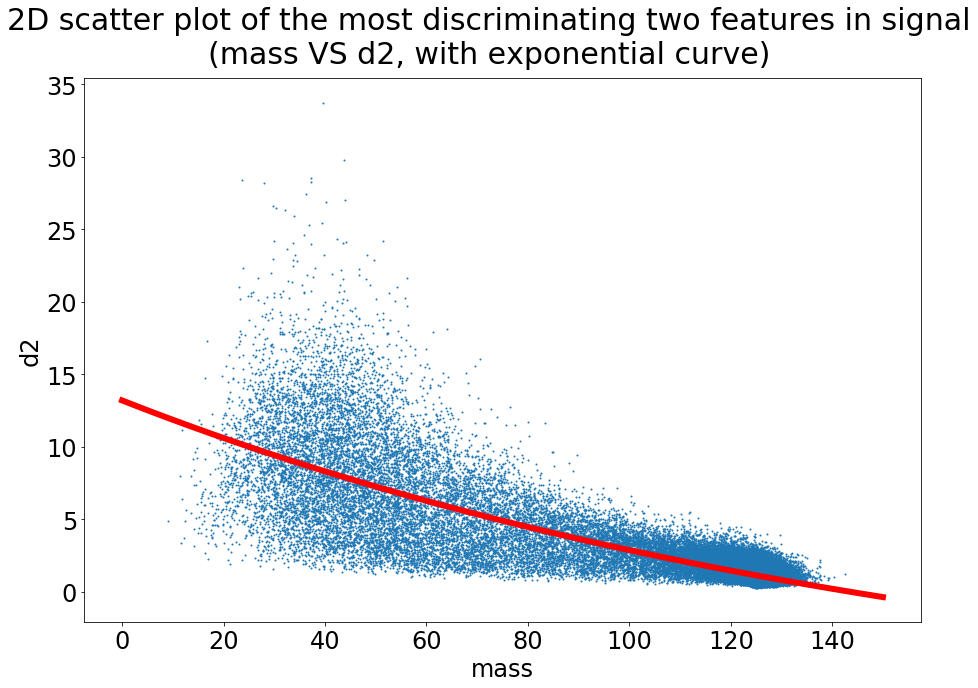

In [358]:
plt.suptitle('2D scatter plot of the most discriminating two features in signal\n(mass VS d2, with exponential curve)', fontsize=30)
plt.xlabel('mass', fontsize = 24)
plt.ylabel('d2', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_higgs['mass'], data_higgs['d2'], s=1) 
x = np.linspace(0,150,10000)
plt.plot(x, fit_s[0][0] * np.exp(fit_s[0][1]*(x)) + fit_s[0][2], color = 'red', linewidth = 6)
plt.show()

# I've found a curve, but I don't know how that gives rise to a better sensitivity. Help is appreciated.

# === End of Lab 07 ===